In [1]:
import os

data_path = os.getcwd() + '/KuaiRec/data/'
os.listdir(data_path)

['item_daily_features.csv',
 'big_matrix.csv',
 'user_features.csv',
 'social_network.csv',
 'item_categories.csv',
 'small_matrix.csv']

## Interaction data

In [2]:
import pandas as pd

big_data = pd.read_csv(data_path + 'big_matrix.csv')
small_data = pd.read_csv(data_path + 'small_matrix.csv')

big_data.shape, small_data.shape

((12530806, 8), (4676570, 8))

In [6]:
big_data.columns, small_data.columns

(Index(['user_id', 'video_id', 'play_duration', 'video_duration', 'time',
        'date', 'timestamp', 'watch_ratio'],
       dtype='object'),
 Index(['user_id', 'video_id', 'play_duration', 'video_duration', 'time',
        'date', 'timestamp', 'watch_ratio'],
       dtype='object'))

- 공통적으로 같은 column

(from official description)

```
user_id (int64): The ID of the user.
video_id (int64):  The ID of the viewed video.
play_duration (int64):	Time of video viewing of this interaction (millisecond).
video_duration (int64):	Time of this video (millisecond).
time (str, datetime):	Human-readable date for this interaction.
date (int64):	Date of this interaction.
timestamp (float64):	Unix timestamp	
watch_ratio (float64):	The video watching ratio (=play_duration/video_duration)

The “watch_ratio” can be deemed as the label of the interaction. 
Note: there is no “like” signal for this dataset. If you need this binary signal in your scenarios, you can create it yourself.
E.g., like = 1 if watch_ratio > 2.0.
```

- user_id == user_id
- video_id == item_id
- watch_ratio == rating

> watch_ratio 가 아닌 play_duration을 rating으로 한다면?

In [7]:
big_data['user_id'].nunique(), big_data['video_id'].nunique()

(7176, 10728)

In [8]:
small_data['user_id'].nunique(), small_data['video_id'].nunique()

(1411, 3327)

In [31]:
import numpy as np

user_list_big = big_data['user_id'].unique()
user_list_small = small_data['user_id'].unique()

intersect_user = np.intersect1d(user_list_big, user_list_small)

item_list_big = big_data['video_id'].unique()
item_list_small = small_data['video_id'].unique()

intersect_item = np.intersect1d(item_list_big, item_list_small)

len(intersect_user), len(intersect_item)

(1411, 3327)

- small에 있는 사용자는 모두 big에도 존재함

count   12530806.0000
mean           0.9445
std            1.6746
min            0.0000
25%            0.3148
50%            0.7235
75%            1.1776
max          573.4571
Name: watch_ratio, dtype: float64


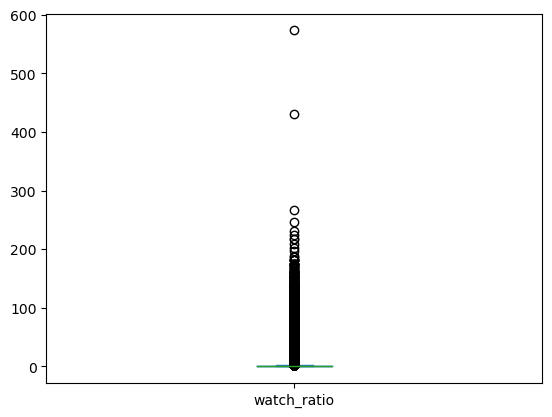

In [20]:
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

print(big_data['watch_ratio'].describe())
big_data['watch_ratio'].plot(kind='box')
plt.show()

count   4676570.0000
mean          0.9071
std           1.3623
min           0.0000
25%           0.4676
50%           0.7692
75%           1.1206
max         571.5214
Name: watch_ratio, dtype: float64


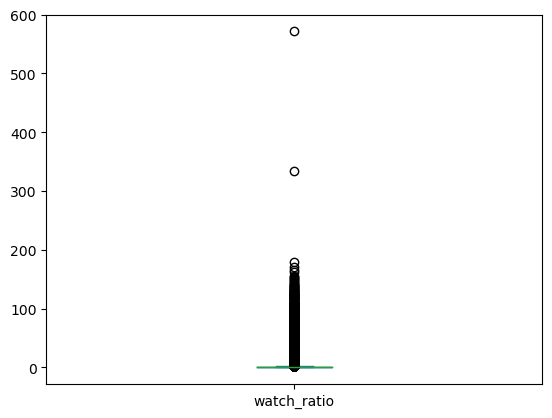

In [21]:
print(small_data['watch_ratio'].describe())
small_data['watch_ratio'].plot(kind='box')
plt.show()

- 극단적으로 높은 watch_ratio가 존재
  - 특정 video를 극심하게 좋아해서 계속 시청하는 사용자?

## Social data

In [27]:
social_network = pd.read_csv(data_path + 'social_network.csv')
social_network, social_network['user_id'].nunique()

(     user_id   friend_list
 0       3371        [2975]
 1         24        [2665]
 2       4402          [38]
 3       4295        [4694]
 4       7087        [7117]
 ..       ...           ...
 467     2331        [4345]
 468     6163        [1332]
 469     3732         [670]
 470     3335         [202]
 471     5352  [4202, 7126]
 
 [472 rows x 2 columns],
 472)

count   472.0000
mean      8.2542
std       4.9690
min       4.0000
25%       6.0000
50%       6.0000
75%      10.2500
max      30.0000
Name: num_friend, dtype: float64


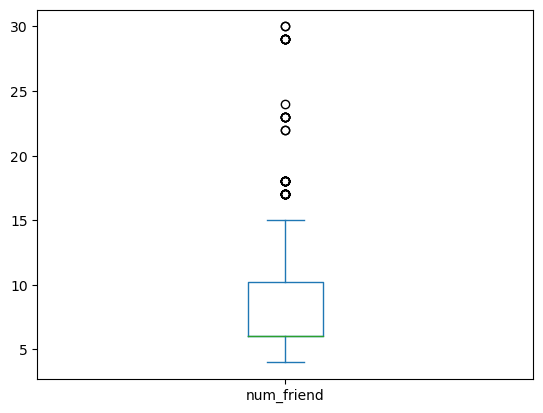

In [30]:
social_network['num_friend'] = social_network['friend_list'].apply(lambda x: len(x))
print(social_network['num_friend'].describe())
social_network['num_friend'].plot(kind='box')
plt.show()

- 모든 사용자가 social 관계가 있는 것으로 보이진 않음.
  - 있는 사람은 보통 8명의 관계가 존재
  - 소셜관계가 활발한 사용자 몇몇이 존재

## User feature data

In [32]:
user_feature = pd.read_csv(data_path + 'user_features.csv')
user_feature

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,7171,full_active,0,0,1,52,"(50,100]",1,"[1,10)",0,...,259,1,4,0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7172,7172,full_active,0,0,0,45,"(10,50]",2,"[1,10)",2,...,11,2,0,0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7173,7173,full_active,0,0,0,615,500+,3,"[1,10)",2,...,51,2,2,0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7174,7174,full_active,0,0,0,959,500+,0,0,0,...,107,3,2,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [34]:
user_feature.columns

Index(['user_id', 'user_active_degree', 'is_lowactive_period',
       'is_live_streamer', 'is_video_author', 'follow_user_num',
       'follow_user_num_range', 'fans_user_num', 'fans_user_num_range',
       'friend_user_num', 'friend_user_num_range', 'register_days',
       'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat2',
       'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6',
       'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10',
       'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14',
       'onehot_feat15', 'onehot_feat16', 'onehot_feat17'],
      dtype='object')

- user를 직관적으로 잘 표현할 수 있을 것으로 보이는 feature?
  - `follow_user_num`: 이 사용자를 팔로우하는 사람 수
  - `friend_user_num`: 이 사용자가 맺은 친구 수
  - `fans_user_num`: 이 사용자의 팬 수
  - `register_days`: 이 사용자가 서비스를 이용한지 지난 시간

In [39]:
print(user_feature['follow_user_num'].describe())
print('\n')
print(user_feature['friend_user_num'].describe())

count   7176.0000
mean     197.3279
std      426.5432
min        0.0000
25%        9.0000
50%       33.0000
75%      130.0000
max     2100.0000
Name: follow_user_num, dtype: float64


count   7176.0000
mean       4.4948
std       44.8979
min        0.0000
25%        0.0000
50%        0.0000
75%        1.0000
max     1425.0000
Name: friend_user_num, dtype: float64


- 사용자 마다, 팔로우하는 사람 수도 극단적인 경향이 존재.
  - q50이 33인데, q75가 130, std가 426
  - 팔로우하는 사람 수의 분포는 극단적인 tail 분포 형태.
- 친구 수 또한 극단적인 경향이 존재.
  - q75만큼은 친구 수가 0 또는 1명, std가 44.
  - 친구 수 분포가 극단적인 tail 분포 형태임을 유추해볼 수 있고, 특정 사용자에게 overfit이 될 수도 있을 것 같음.

- 두 feature를 사용한다면? scaling 후에 활용?

In [40]:
print(user_feature['fans_user_num'].describe())
print('\n')
print(user_feature['register_days'].describe())

count    7176.0000
mean       12.5531
std       181.0175
min         0.0000
25%         0.0000
50%         2.0000
75%         6.0000
max     11401.0000
Name: fans_user_num, dtype: float64


count   7176.0000
mean     296.7907
std      286.3813
min        0.0000
25%      132.0000
50%      225.0000
75%      324.0000
max     2245.0000
Name: register_days, dtype: float64


- 이전과 마찬가지로, 팬인 사용자 수 또한 극단적.
- 서비스를 이용한 시간(날짜)도 극단적.

## Item category data

In [42]:
item_category = pd.read_csv(data_path + 'item_categories.csv')
item_category['num_feat'] = item_category['feat'].apply(lambda x: len(x))
item_category, item_category['num_feat'].describe()

(       video_id     feat  num_feat
 0             0      [8]         3
 1             1  [27, 9]         7
 2             2      [9]         3
 3             3     [26]         4
 4             4      [5]         3
 ...         ...      ...       ...
 10723     10723     [11]         4
 10724     10724      [2]         3
 10725     10725     [15]         4
 10726     10726     [19]         4
 10727     10727      [5]         3
 
 [10728 rows x 3 columns],
 count   10728.0000
 mean        4.2519
 std         1.6321
 min         3.0000
 25%         3.0000
 50%         4.0000
 75%         4.0000
 max        15.0000
 Name: num_feat, dtype: float64)

- 아이템 고유의 feature, 해당 아이템의 카테고리.
    - 아이템이 video이므로, 서비스에 업로드 되었을 때 붙은 카테고리 (e.g. 유머, 진지, 호러 등...)로 생각해볼 수 있음.

## Interaction data (2)

In [48]:
item_user_interaction_big = big_data.groupby('video_id').agg({'user_id': list}).reset_index()
item_user_interaction_big['num_user'] = item_user_interaction_big['user_id'].apply(lambda x: len(x))
item_user_interaction_big['num_user'].describe()

count   10728.0000
mean     1168.0468
std      1599.9257
min         1.0000
25%        38.0000
50%       243.0000
75%      2142.5000
max     27615.0000
Name: num_user, dtype: float64

<AxesSubplot:title={'center':'Number of users interacted with items'}, xlabel='video_id'>

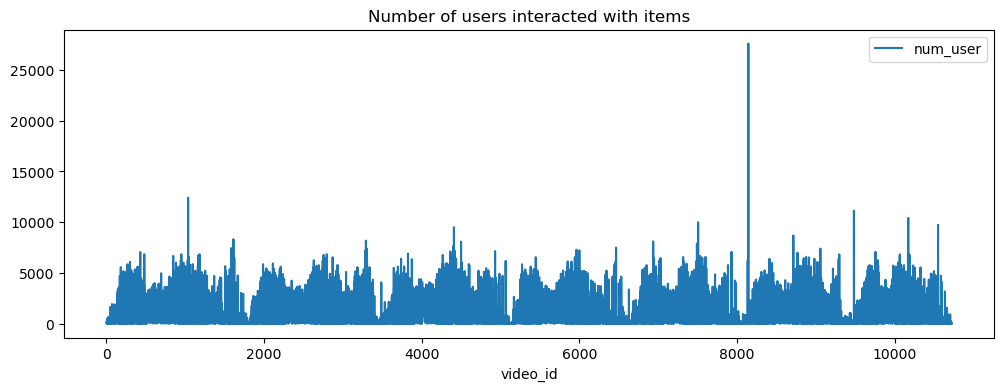

In [53]:
item_user_interaction_big.plot(kind='line', x='video_id', y='num_user', figsize=(12, 4), title="Number of users interacted with items")

- 아이템과 상호작용한 사용자 수?
  - 아주 극단적으로 많이 소비된 아이템이 존재.
  - 반면 100번 미만으로 소비된 아이템들도 대다수 존재.

In [52]:
user_item_interaction_big = big_data.groupby('user_id').agg({'video_id':list}).reset_index()
user_item_interaction_big['num_item'] = user_item_interaction_big['video_id'].apply(lambda x: len(x))
user_item_interaction_big['num_item'].describe()

count    7176.0000
mean     1746.2104
std       991.8322
min       100.0000
25%       883.0000
50%      1846.5000
75%      2461.0000
max     16015.0000
Name: num_item, dtype: float64

<AxesSubplot:title={'center':'Number of items interacted with users'}, xlabel='user_id'>

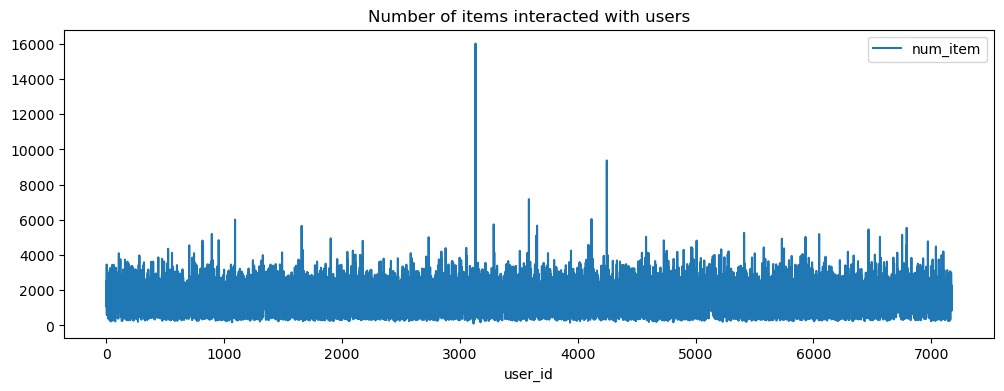

In [55]:
user_item_interaction_big.plot(kind='line', x='user_id', y='num_item', figsize=(12, 4), title="Number of items interacted with users")

- 사용자마다 상호작용한 아이템 수?
  - 마찬가지로 많이 극단적으로 소비한 아이템이 많은 사용자가 일부 존재.
  - 앞선 아이템의 경우에 비해, 대부분이 생각보다 유사한 수의 아이템을 소비.

## Process

1. big data를 이용해 train -> small data를 이용해 valid/test
    - 사용할 column: `user_id`, `video_id`, `watch_ratio` (or `play_duration`)
2. feature data 활용?
    - 앞서 `.csv`에 있던 4개의 feature를 활용? 또는 `interaction.csv`에서 추출한 상호작용한 아이템/사용자 수를 활용?
3. Task?
    - watch 유무에 따른 binary classification?
    - `watch_ratio` (or `play_duration`)을 target value로 둔 rating regression?

<br>

## To use model

- Matrix Factorization (GMF part of NeuMF)
- Neural Collaborative Filtering (MLP part of NeuMF) 
- Neural Matrix Factorization (NeuMF)

$\rightarrow$ linear한 관계만을 봤을 때, non-linear한 관계만을 봤을때, 둘다 봤을때를 비교